__Completed by:__

Name : Adarsh Ghimire

Student ID : 100058927

MSc in Electrical and Computer Engineering

This notebook comprises of downloading process using api, then data processing for making training and testing data.

Then, also, it comprises of complete analysis done on the training set. Such that, the functions created for data analysis and manipulations can be used for future model development and testing.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
!ls "drive/MyDrive/COSC 606 Machine learning/Project"

dataset  final_dataset	notebooks  test.csv  train.csv


In [ ]:
import os
os.chdir('drive/MyDrive/COSC 606 Machine learning/Project/notebooks/')
!pwd

/content/drive/MyDrive/COSC 606 Machine learning/Project/notebooks


## Downloading all the dataset using API

In [ ]:
import pandas as pd
import requests
 

# Get the dataset metadata by passing package_id to the package_search endpoint
# For example, to retrieve the metadata for this dataset:
 
url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show"
params = { "id": "b68cb71b-44a7-4394-97e2-5d2f41462a5d"}
package = requests.get(url, params = params).json()
print(package["result"])

{'license_title': 'Open Government Licence – Toronto', 'owner_unit': None, 'relationships_as_object': [], 'topics': 'Transportation', 'owner_email': 'Andrew.Hutt@ttc.ca', 'excerpt': 'TTC Streetcar Delay Data', 'private': False, 'owner_division': 'Toronto Transit Commission', 'num_tags': 5, 'id': 'b68cb71b-44a7-4394-97e2-5d2f41462a5d', 'metadata_created': '2019-07-23T18:12:13.621158', 'refresh_rate': 'Monthly', 'title': 'TTC Streetcar Delay Data', 'license_url': 'https://open.toronto.ca/open-data-license/', 'state': 'active', 'information_url': None, 'license_id': 'open-government-licence-toronto', 'type': 'dataset', 'resources': [{'cache_last_updated': None, 'package_id': 'b68cb71b-44a7-4394-97e2-5d2f41462a5d', 'datastore_active': False, 'id': '146bfbda-8146-4ff8-b3dc-1eec3a5170fe', 'size': 12886, 'format': 'XLSX', 'state': 'active', 'hash': '', 'description': '', 'is_preview': False, 'last_modified': '2019-08-15T16:25:06.166714', 'url_type': 'upload', 'mimetype': 'application/vnd.open

In [ ]:
# Checking how the api is returning the data
from pprint import pprint
pprint(package)

{'help': 'https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/help_show?name=package_show',
 'result': {'civic_issues': 'Mobility',
            'collection_method': None,
            'creator_user_id': '150d5301-86ec-44a3-a070-50f2cea839c9',
            'dataset_category': 'Document',
            'excerpt': 'TTC Streetcar Delay Data',
            'formats': 'XLSX',
            'groups': [],
            'id': 'b68cb71b-44a7-4394-97e2-5d2f41462a5d',
            'image_url': None,
            'information_url': None,
            'is_retired': False,
            'isopen': False,
            'last_refreshed': '2020-10-14T14:13:44.785549',
            'license_id': 'open-government-licence-toronto',
            'license_title': 'Open Government Licence – Toronto',
            'license_url': 'https://open.toronto.ca/open-data-license/',
            'limitations': None,
            'metadata_created': '2019-07-23T18:12:13.621158',
            'metadata_modified': '2020-10-14T14:13:45.

In [ ]:
# From above we can see that the data is available at the "url" key
# "url" key is under "resources" key
# "resources" key is under "result" key of the returned json file

# resources has list value, where each element of list is a dict
# and inside each dict, there is "url" key which hold the url to the data
print(type(package["result"]["resources"])) # value type of resources key
for i in package["result"]["resources"]:
  print(i["url"])

<class 'list'>
https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/b68cb71b-44a7-4394-97e2-5d2f41462a5d/resource/146bfbda-8146-4ff8-b3dc-1eec3a5170fe/download/ttc-streetcar-delay-data-readme.xlsx
https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/b68cb71b-44a7-4394-97e2-5d2f41462a5d/resource/4f115333-57c9-445c-a769-9b831798b314/download/ttc-streetcar-delay-data-2014.xlsx
https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/b68cb71b-44a7-4394-97e2-5d2f41462a5d/resource/0c047b96-4f64-44c7-8980-ae2e3f8e7433/download/ttc-streetcar-delay-data-2015.xlsx
https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/b68cb71b-44a7-4394-97e2-5d2f41462a5d/resource/1240f170-7800-4283-9f5e-0fa398185e3a/download/ttc-streetcar-delay-data-2016.xlsx
https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/b68cb71b-44a7-4394-97e2-5d2f41462a5d/resource/99f512ad-7ac5-49ac-884e-a7a6fbe604b5/download/ttc-streetcar-delay-data-2017.xlsx
https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/b68cb71b-44a

In [ ]:
!ls ..

dataset  final_dataset	notebooks  test.csv  train.csv


In [ ]:
# Downloading the data from the extracted URL, and saving in the dataset folder
dataset_dir = "../dataset/"
try:
    os.mkdir(dataset_dir)
    print("[INFO] Downloading files")
    for i in package["result"]["resources"]:
      url = i["url"]
      resp = requests.get(url)
      file_name = i["url"].split("/")[-1] # masking the file name from url
      print("[INFO] File {} downloaded".format(file_name))
      output = open('../dataset/'+file_name, 'wb')
      output.write(resp.content)
      output.close()
    print("[INFO] Download complete")
except OSError as error:
    print("Following files already exist inside the directory")
    for i in os.listdir(dataset_dir):
      print(i)
  

Following files already exist inside the directory
ttc-streetcar-delay-data-readme.xlsx
ttc-streetcar-delay-data-2014.xlsx
ttc-streetcar-delay-data-2015.xlsx
ttc-streetcar-delay-data-2016.xlsx
ttc-streetcar-delay-data-2017.xlsx
ttc-streetcar-delay-data-2018.xlsx
ttc-streetcar-delay-data-2020.xlsx
ttc-streetcar-delay-data-2019.xlsx


In [ ]:
!ls ../dataset

ttc-streetcar-delay-data-2014.xlsx  ttc-streetcar-delay-data-2018.xlsx
ttc-streetcar-delay-data-2015.xlsx  ttc-streetcar-delay-data-2019.xlsx
ttc-streetcar-delay-data-2016.xlsx  ttc-streetcar-delay-data-2020.xlsx
ttc-streetcar-delay-data-2017.xlsx  ttc-streetcar-delay-data-readme.xlsx


In [ ]:
# Successfully downloaded all the data from the web api.

## 1. List the data you need and how much you need.

In [ ]:
# importing the pandas and numpy for data manipulations
import pandas as pd
import numpy as np

In [ ]:
dataset_list = os.listdir(dataset_dir)
print(dataset_list)

# removing readme file from the list
dataset_list.remove("ttc-streetcar-delay-data-readme.xlsx")
print(dataset_list)

['ttc-streetcar-delay-data-readme.xlsx', 'ttc-streetcar-delay-data-2014.xlsx', 'ttc-streetcar-delay-data-2015.xlsx', 'ttc-streetcar-delay-data-2016.xlsx', 'ttc-streetcar-delay-data-2017.xlsx', 'ttc-streetcar-delay-data-2018.xlsx', 'ttc-streetcar-delay-data-2020.xlsx', 'ttc-streetcar-delay-data-2019.xlsx']
['ttc-streetcar-delay-data-2014.xlsx', 'ttc-streetcar-delay-data-2015.xlsx', 'ttc-streetcar-delay-data-2016.xlsx', 'ttc-streetcar-delay-data-2017.xlsx', 'ttc-streetcar-delay-data-2018.xlsx', 'ttc-streetcar-delay-data-2020.xlsx', 'ttc-streetcar-delay-data-2019.xlsx']


In [ ]:
# Extracting years from file names so as to use it for later 
# Later it will be used for naming variable for the dataframe dictionary in single shot
years = []
for i in dataset_list:
  years.append(i.split(".")[0][-4:])
print(years)

['2014', '2015', '2016', '2017', '2018', '2020', '2019']


In [ ]:
df = {} # list of data frames
for i,j in zip(years, dataset_list):
  df[i] = pd.concat(pd.read_excel(dataset_dir+j, sheet_name=None), ignore_index=True)

In [ ]:
df.keys()

dict_keys(['2014', '2015', '2016', '2017', '2018', '2020', '2019'])

In [ ]:
df["2014"].head()

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Dundas and Roncesvalles,Late Leaving Garage,4.0,8.0,E/B,4018.0
1,2014-01-02,504,12:43:00,Thursday,King and Shaw,Utilized Off Route,20.0,22.0,E/B,4128.0
2,2014-01-02,501,14:01:00,Thursday,Kingston road and Bingham,Held By,13.0,19.0,W/B,4016.0
3,2014-01-02,504,14:22:00,Thursday,King St. and Roncesvalles Ave.,Investigation,7.0,11.0,W/B,4175.0
4,2014-01-02,504,16:42:00,Thursday,King and Bathurst,Utilized Off Route,3.0,6.0,E/B,4080.0


In [ ]:
df["2014"].tail()

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
11022,2014-12-31,509,22:30:00,Wednesday,Union Loop to Exhibition Loop,General Delay,10.0,20.0,B/W,NaN
11023,2014-12-31,504,22:54:00,Wednesday,King and Dunn,Emergency Services,11.0,16.0,E/B,4128.0
11024,2014-12-31,505,23:00:00,Wednesday,Dundas West Station to Broadview Station,General Delay,10.0,12.0,B/W,NaN
11025,2014-12-31,511,23:01:00,Wednesday,CNE,Mechanical,8.0,16.0,N/B,4160.0
11026,2014-12-31,504,23:18:00,Wednesday,King and Bathurst,Mechanical,7.0,14.0,E/B,4128.0


In [ ]:
# Calculating the total amount of examples we have
samples = 0
for i in years:
  samples += len(df[i])
print("Total number of examples are : {}".format(samples))

Total number of examples are : 82702


In [ ]:
df[years[0]].columns

Index(['Report Date', 'Route', 'Time', 'Day', 'Location', 'Incident',
       'Min Delay', 'Min Gap', 'Direction', 'Vehicle'],
      dtype='object')

In [ ]:
# Before Merging all the years dataset
# Figuring out first, if the column name of all the years dataset are same, so that later there won't be issue on merging those dataframes
initial_column_names = df[years[0]].columns
for i in range(1, len(years)):
    try :
      np.any(initial_column_names == df[years[i]].columns)
      print("Matching {}".format(years[i]))
    except:
      print("Matching Issue in the year {}".format(years[i]))

Matching 2015
Matching 2016
Matching 2017
Matching 2018
Matching 2020
Matching 2019


In [ ]:
merged_df = pd.concat([df[years[0]], 
                       df[years[1]], 
                       df[years[2]],
                       df[years[3]],
                       df[years[4]],
                       df[years[5]],
                       df[years[6]]], ignore_index=True)

In [ ]:
len(merged_df)

82702

In [ ]:
merged_df.head()

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Dundas and Roncesvalles,Late Leaving Garage,4.0,8.0,E/B,4018.0
1,2014-01-02,504,12:43:00,Thursday,King and Shaw,Utilized Off Route,20.0,22.0,E/B,4128.0
2,2014-01-02,501,14:01:00,Thursday,Kingston road and Bingham,Held By,13.0,19.0,W/B,4016.0
3,2014-01-02,504,14:22:00,Thursday,King St. and Roncesvalles Ave.,Investigation,7.0,11.0,W/B,4175.0
4,2014-01-02,504,16:42:00,Thursday,King and Bathurst,Utilized Off Route,3.0,6.0,E/B,4080.0


In [ ]:
merged_df.tail()

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
82697,2019-12-31,505,20:00:00,Tuesday,Parliament,General Delay,18.0,23.0,W/B,1262.0
82698,2019-12-31,505,20:32:00,Tuesday,Broadview Station,Emergency Services,5.0,10.0,W/B,3104.0
82699,2019-12-31,501,22:32:00,Tuesday,Humber Loop,Held By,5.0,10.0,E/B,4576.0
82700,2019-12-31,506,23:20:00,Tuesday,Carlton and Parliament,General Delay,20.0,26.0,E/B,4498.0
82701,2019-12-31,511,23:36:00,Tuesday,Bathurst Station,Held By,7.0,14.0,S/B,4583.0


In [ ]:
# Saving the merged dataframe for use later directly
# It allows the later portion of creating and making data analysis and dividing data for ML algorithms training easy
final_dataset_path = "../final_dataset/"
if "merged_data.csv" in os.listdir(final_dataset_path):
  print("Merged dataset already exist")
else:
  merged_df.to_csv(dataset_dir+"merged_data.csv", index=False)

Merged dataset already exist


____________

## Merged data analysis

In [ ]:
%reset 
# resetting al the previously used data, to remove the memory space

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
%whos

Interactive namespace is empty.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('drive/MyDrive/COSC 606 Machine learning/Project/notebooks/')
!pwd

/content/drive/MyDrive/COSC 606 Machine learning/Project/notebooks


In [ ]:
import numpy as np
import pandas as pd
final_dataset_path = "../final_dataset/"
merged_dataset_path = final_dataset_path+"merged_data.csv"
df = pd.read_csv(merged_dataset_path)
df.head()

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Dundas and Roncesvalles,Late Leaving Garage,4.0,8.0,E/B,4018.0
1,2014-01-02,504,12:43:00,Thursday,King and Shaw,Utilized Off Route,20.0,22.0,E/B,4128.0
2,2014-01-02,501,14:01:00,Thursday,Kingston road and Bingham,Held By,13.0,19.0,W/B,4016.0
3,2014-01-02,504,14:22:00,Thursday,King St. and Roncesvalles Ave.,Investigation,7.0,11.0,W/B,4175.0
4,2014-01-02,504,16:42:00,Thursday,King and Bathurst,Utilized Off Route,3.0,6.0,E/B,4080.0


In [ ]:
df.tail()

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
82697,2020-07-26,501,12:58:00,Sunday,QUEEN AND DUFFERIN,Mechanical,10.0,20.0,W/B,4422.0
82698,2020-07-27,301,02:09:00,Monday,QUEEN AND YORK,Mechanical,25.0,35.0,E/B,4514.0
82699,2020-07-27,306,02:20:00,Monday,Dundas West Station,Emergency Services,19.0,34.0,E/B,3129.0
82700,2020-08-03,504,00:56:00,Monday,Dufferin Loop,Mechanical,10.0,20.0,E/B,4464.0
82701,2020-08-03,501,23:42:00,Monday,Queen and Connaught (Russell Trailer Track),Investigation,10.0,20.0,W/B,4466.0


## Data analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82702 entries, 0 to 82701
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Report Date  82702 non-null  object 
 1   Route        82702 non-null  int64  
 2   Time         82702 non-null  object 
 3   Day          82702 non-null  object 
 4   Location     82439 non-null  object 
 5   Incident     82702 non-null  object 
 6   Min Delay    82623 non-null  float64
 7   Min Gap      82581 non-null  float64
 8   Direction    82393 non-null  object 
 9   Vehicle      78017 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 6.3+ MB


The data is using 6.3 Megabyte.

The data memory usage is not much of an issue, since it is only 6.3MB.

The major objective of the data is:
1. We have to use the infomation in order to predict which route has how much of delay.
2. Which direction provides the least delay
3. Data to use for prediction of delay are:
* __Date__
* __Route__
* __Time__
* __Day__
* __Direction__
* __Min Gap__
* _Location is also not significant, since the incident can occur any place, and we cannot know it before hand. But for data analysis, to verify it does not make sense for ML model it will taken into consideration_
* _Incident_ cannot be used as feature since it is reported when the incident happens, so it cannot it known before hand to be used as feature.
* _Vehicle number is also not a suitable parameter to use, since it is just a number_



In [ ]:
# Dividing data into training and testing data.
selected_columns = ['Report Date', 'Route', 'Time', 'Day', 'Location', 'Direction', 'Min Delay', "Min Gap"]
new_df = df[selected_columns]

In [ ]:
new_df.head()

,Report Date,Route,Time,Day,Location,Direction,Min Delay,Min Gap
0,2014-01-02,505,06:31:00,Thursday,Dundas and Roncesvalles,E/B,4.0,8.0
1,2014-01-02,504,12:43:00,Thursday,King and Shaw,E/B,20.0,22.0
2,2014-01-02,501,14:01:00,Thursday,Kingston road and Bingham,W/B,13.0,19.0
3,2014-01-02,504,14:22:00,Thursday,King St. and Roncesvalles Ave.,W/B,7.0,11.0
4,2014-01-02,504,16:42:00,Thursday,King and Bathurst,E/B,3.0,6.0


In [ ]:
# Since the order of the data matters interms of date
# I will use 90% of data to make a training model
# Will use 10% of last data to test the model

# The reason to select 90% for training is because the dataset is quiet small in size
# So it is better to enough data to train the model
# And, ofcourse, evaluation on test set still holds reasonably acceptable
train_test_percentage = 0.9

train_df = new_df.iloc[:int(len(new_df)*train_test_percentage)]
test_df = new_df.iloc[int(len(new_df)*train_test_percentage):]
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74431 entries, 0 to 74430
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Report Date  74431 non-null  object 
 1   Route        74431 non-null  int64  
 2   Time         74431 non-null  object 
 3   Day          74431 non-null  object 
 4   Location     74189 non-null  object 
 5   Direction    74144 non-null  object 
 6   Min Delay    74363 non-null  float64
 7   Min Gap      74331 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 4.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8271 entries, 74431 to 82701
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Report Date  8271 non-null   object 
 1   Route        8271 non-null   int64  
 2   Time         8271 non-null   object 
 3   Day          8271 non-null   object 
 4   Location     8250 non-null   object 


In [ ]:
train_df.head()

,Report Date,Route,Time,Day,Location,Direction,Min Delay,Min Gap
0,2014-01-02,505,06:31:00,Thursday,Dundas and Roncesvalles,E/B,4.0,8.0
1,2014-01-02,504,12:43:00,Thursday,King and Shaw,E/B,20.0,22.0
2,2014-01-02,501,14:01:00,Thursday,Kingston road and Bingham,W/B,13.0,19.0
3,2014-01-02,504,14:22:00,Thursday,King St. and Roncesvalles Ave.,W/B,7.0,11.0
4,2014-01-02,504,16:42:00,Thursday,King and Bathurst,E/B,3.0,6.0


In [ ]:
train_df.tail()


,Report Date,Route,Time,Day,Location,Direction,Min Delay,Min Gap
74426,2019-08-03,510,09:55:00,Saturday,Spadina and Queensquay,S/B,8.0,16.0
74427,2019-08-03,501,10:21:00,Saturday,King/Spadina,W/B,7.0,14.0
74428,2019-08-03,505,10:37:00,Saturday,Broadview Station,W/B,5.0,10.0
74429,2019-08-03,505,10:37:00,Saturday,Dundas West Station,E/B,5.0,10.0
74430,2019-08-03,504,11:50:00,Saturday,King/Bathurst,E/B,9.0,16.0


In [ ]:
test_df.head()

,Report Date,Route,Time,Day,Location,Direction,Min Delay,Min Gap
74431,2019-08-03,510,12:18:00,Saturday,Spadina and Sullivan,N/B,9.0,13.0
74432,2019-08-03,501,13:15:00,Saturday,Triller Ave,W/B,42.0,47.0
74433,2019-08-03,504,14:32:00,Saturday,King and Jameson,B/W,15.0,20.0
74434,2019-08-03,501,14:42:00,Saturday,Connaugh Ave,W/B,20.0,15.0
74435,2019-08-03,504,15:08:00,Saturday,King and Bay,B/W,222.0,226.0


In [ ]:
test_df.tail()

,Report Date,Route,Time,Day,Location,Direction,Min Delay,Min Gap
82697,2020-07-26,501,12:58:00,Sunday,QUEEN AND DUFFERIN,W/B,10.0,20.0
82698,2020-07-27,301,02:09:00,Monday,QUEEN AND YORK,E/B,25.0,35.0
82699,2020-07-27,306,02:20:00,Monday,Dundas West Station,E/B,19.0,34.0
82700,2020-08-03,504,00:56:00,Monday,Dufferin Loop,E/B,10.0,20.0
82701,2020-08-03,501,23:42:00,Monday,Queen and Connaught (Russell Trailer Track),W/B,10.0,20.0


In [ ]:
# saving the train and test dataset for later model training and testing
# train_df.to_csv(final_dataset_path+"train.csv", index=False)
# test_df.to_csv(final_dataset_path+"test.csv", index=False)

## Training dataset analysis

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
try:
  os.chdir('drive/MyDrive/COSC 606 Machine learning/Project/notebooks/')
except:
  print("Already in the working directory")

Already in the working directory


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv("../final_dataset/train.csv")
train_df.head()

,Report Date,Route,Time,Day,Location,Direction,Min Delay,Min Gap
0,2014-01-02,505,06:31:00,Thursday,Dundas and Roncesvalles,E/B,4.0,8.0
1,2014-01-02,504,12:43:00,Thursday,King and Shaw,E/B,20.0,22.0
2,2014-01-02,501,14:01:00,Thursday,Kingston road and Bingham,W/B,13.0,19.0
3,2014-01-02,504,14:22:00,Thursday,King St. and Roncesvalles Ave.,W/B,7.0,11.0
4,2014-01-02,504,16:42:00,Thursday,King and Bathurst,E/B,3.0,6.0


In [ ]:
# Doing data analysis on training set.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74431 entries, 0 to 74430
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Report Date  74431 non-null  object 
 1   Route        74431 non-null  int64  
 2   Time         74431 non-null  object 
 3   Day          74431 non-null  object 
 4   Location     74189 non-null  object 
 5   Direction    74144 non-null  object 
 6   Min Delay    74363 non-null  float64
 7   Min Gap      74331 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 4.5+ MB


In [ ]:
train_df.describe()

,Route,Min Delay,Min Gap
count,74431.000000,74363.000000,74331.000000
mean,501.037646,12.831933,18.297265
std,44.626436,30.349826,33.943143
min,1.000000,0.000000,0.000000
25%,501.000000,5.000000,9.000000
50%,505.000000,6.000000,12.000000
75%,509.000000,12.000000,20.000000
max,999.000000,1400.000000,4216.000000


We can see from the info of the dataframe that there are null values in the __Min Delay__ which is our target.

Lets see how much NaN values are there in __Min Delay__ column, and then drop those samples

In [ ]:
train_df["Min Delay"].isnull().value_counts() 

False    74363
True        68
Name: Min Delay, dtype: int64

In [ ]:
def clean_delay(df):
  df = df[df['Min Delay'].notna()]
  return df

In [ ]:
# There are 68 examples which has NaN inside Min Delay columns
train_df = clean_delay(train_df)
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74363 entries, 0 to 74430
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Report Date  74363 non-null  object 
 1   Route        74363 non-null  int64  
 2   Time         74363 non-null  object 
 3   Day          74363 non-null  object 
 4   Location     74124 non-null  object 
 5   Direction    74081 non-null  object 
 6   Min Delay    74363 non-null  float64
 7   Min Gap      74317 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 5.1+ MB
None
              Route     Min Delay       Min Gap
count  74363.000000  74363.000000  74317.000000
mean     501.036080     12.831933     18.295652
std       44.628605     30.349826     33.944389
min        1.000000      0.000000      0.000000
25%      501.000000      5.000000      9.000000
50%      505.000000      6.000000     12.000000
75%      509.000000     12.000000     20.000000
max      999.000000  

<Figure size 1440x720 with 0 Axes>

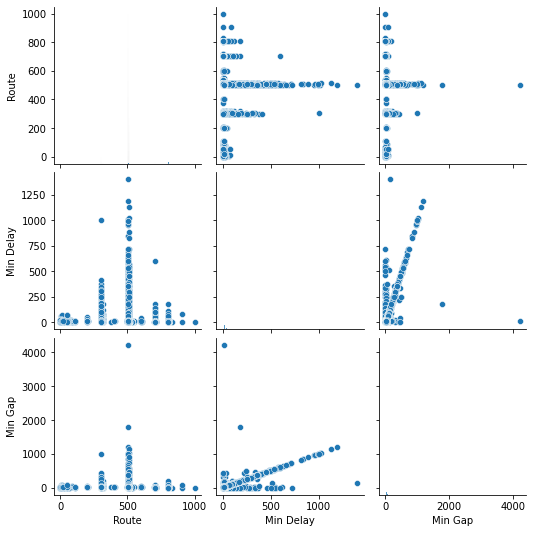

In [ ]:
data_numeric = train_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(20, 10))
sns.pairplot(data_numeric)
plt.show()

From the above plot we can see that there is some relation ship between the route selected and the delay occuring. That is with some routes selected there is more delay, while with other routes there seem to less delays. The relationship between the delay and route looks more like normal distribution, but not completely normal distribution.

Similarly, there is some relation ship between the min gap and the delay. The delay suffered by the street car is related with gap the gap time between the street car itself and the upfront street car. It could be a good feature to be selected for prediction of delay.



## Analysis done on :

*   [ ] Route
*   [ ] Location
*   [ ] Day  
*   [ ] Time
*   [ ] Min Gap
*   [ ] Direction

### More analysis between Route and Min Delay

In [ ]:
train_df["Route"].value_counts()

501    18424
504    14221
506    10159
505     8164
512     5669
       ...  
13         1
204        1
596        1
85         1
64         1
Name: Route, Length: 109, dtype: int64

As this Route number is categorical data, and there seem to be 109 unique routes. 
To confirm that we are dealing with all the operating routes, COnfirming from website of TTC street car dataset. The valid routes for street car are only the one listed below:
* 501
* 502
* 503
* 504
* 505
* 506
* 509
* 510
* 511
* 512
* 301
* 304
* 306
* 310

In [ ]:
def check_route(x):
  # load the valid list of TTC Streetcar routes
  valid_routes = [501, 502, 503, 504, 505, 506, 509, 510, 511, 512, 301, 304, 306, 310]
  if x in valid_routes:
    return x
  else:
    return "bad route"

In [ ]:
#We can see that 2464 directions are non functioning routes.
# Thus removing those examples will not affect alot. Since, most of the routes that we are 
# concerened with still falls in valid routes list
def clean_route(df):
  # This function takes dataframe as input
  # cleans the route column based on the validity of the route of street car
  # returns the cleaned dataframe
  df['Route'] = df['Route'].apply(lambda x:check_route(x))
  df = df[df.Route != "bad route"]
  df['Route'] = df['Route'].astype('int64')
  return df

In [ ]:
train_df = clean_route(train_df)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71967 entries, 0 to 74430
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Report Date  71967 non-null  object 
 1   Route        71967 non-null  int64  
 2   Time         71967 non-null  object 
 3   Day          71967 non-null  object 
 4   Location     71746 non-null  object 
 5   Direction    71686 non-null  object 
 6   Min Delay    71901 non-null  float64
 7   Min Gap      71869 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 4.9+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# No null values in route columns
train_df['Route'].isnull().value_counts()

False    71967
Name: Route, dtype: int64

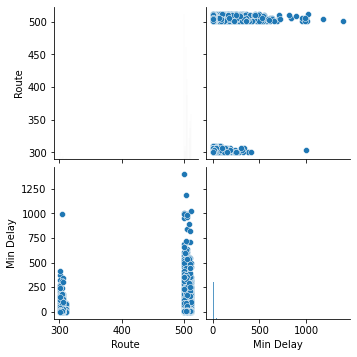

In [ ]:
# Lets try looking into the relationship between the min delay and route
sns.pairplot(train_df[['Route', "Min Delay"]])

From the plot above, it is very clear that the route belonging to 300 numbers suffers pretty less delay compared to the routes with number 500.

Given that, the direction are not considered here into analysis yet. The assumption is that, the route selected by the user will have high impact on delay if the proper direction of the route is selected.

_______

## Analysis done on :

*   [X] Route
*   [ ] Location
*   [ ] Day  
*   [ ] Time
*   [ ] Min Gap
*   [ ] Direction

### More analysis on Location data

In [ ]:
train_df["Location"].describe()

count            71746
unique           16107
top       Russell Yard
freq              1066
Name: Location, dtype: object

There are 16090 unique locations info available in the location column. Using this info is not suitable given the current situation, since it requires geocoding first such that relevant continious values can be taken into consideration. Otherwise, this column has to be treated as discrete value, and will require 16k features. Thus is irrelevant.

Dropping this locations column

In [ ]:
def drop_location(df):
  df = df.drop(["Location"], axis=1)
  return df

In [ ]:
train_df.columns

Index(['Report Date', 'Route', 'Time', 'Day', 'Location', 'Direction',
       'Min Delay', 'Min Gap'],
      dtype='object')

In [ ]:
train_df = drop_location(train_df)

In [ ]:
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71967 entries, 0 to 74430
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Report Date  71967 non-null  object 
 1   Route        71967 non-null  int64  
 2   Time         71967 non-null  object 
 3   Day          71967 non-null  object 
 4   Direction    71686 non-null  object 
 5   Min Delay    71901 non-null  float64
 6   Min Gap      71869 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 4.4+ MB
None
              Route     Min Delay       Min Gap
count  71967.000000  71901.000000  71869.000000
mean     501.060972     12.665749     18.119982
std       28.804500     29.733220     33.659001
min      301.000000      0.000000      0.000000
25%      501.000000      5.000000      9.000000
50%      504.000000      6.000000     12.000000
75%      506.000000     11.000000     20.000000
max      512.000000   1400.000000   4216.000000


## Analysis done on :

*   [x] Route
*   [x] Location
*   [ ] Day  
*   [ ] Time
*   [ ] Min Gap
*   [ ] Direction

_______

### Analysis on Day of a week

Here, the analysis will be done, on average how much delay each day of the week has. And which week has more delay and which has less. To figure out if the delay is depending on the day of the week or not

In [ ]:
# Checking if the day column has nan values
train_df["Day"].isnull().value_counts()

False    71967
Name: Day, dtype: int64

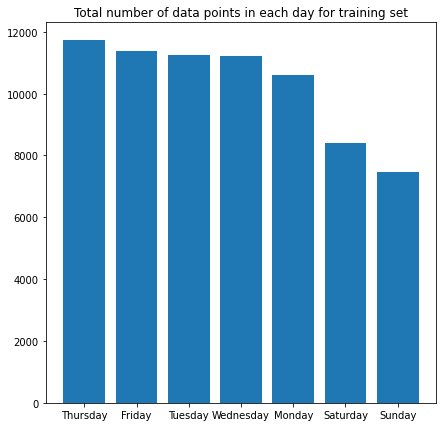

In [ ]:
# There are no null values in day column. So lets move forward with the analysis
plt.figure(figsize=(7,7))
plt.bar(train_df["Day"].value_counts().reset_index()['index'], train_df["Day"].value_counts().reset_index()['Day'])
plt.title("Total number of data points in each day for training set")
plt.show()

We have more data points in thursday, then least number of data points on sunday

<BarContainer object of 7 artists>

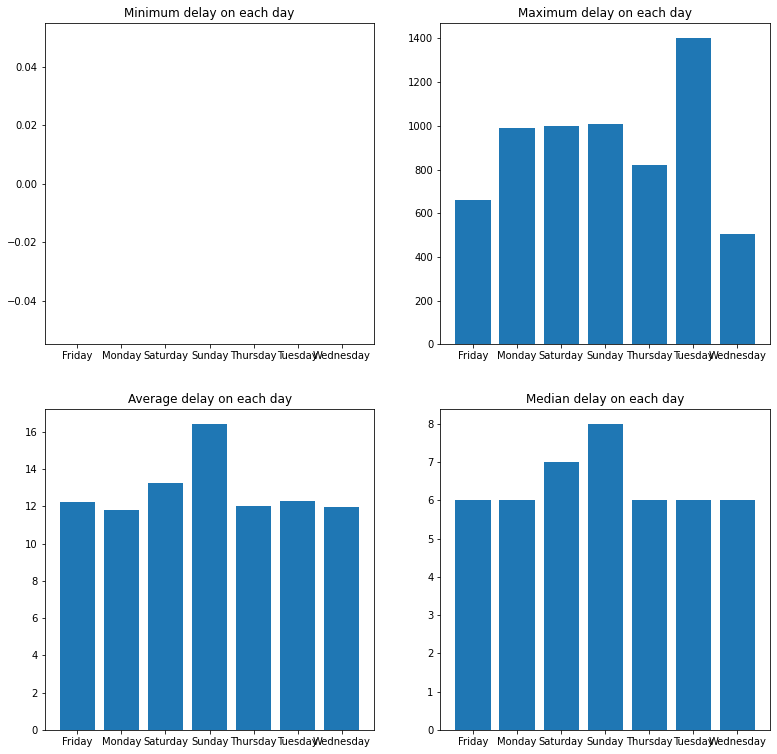

In [ ]:
# Let's plot some bar graph showing how much delay are occuring in each day of the week
plt.figure(figsize=(13, 13))
plt.subplot(2,2,1)
plt.title("Minimum delay on each day")
plt.bar(train_df.groupby(["Day"])["Min Delay"].min().reset_index()['Day'], train_df.groupby(["Day"])["Min Delay"].min())
plt.subplot(2,2,2)
plt.title("Maximum delay on each day")
plt.bar(train_df.groupby(["Day"])["Min Delay"].max().reset_index()['Day'], train_df.groupby(["Day"])["Min Delay"].max())
plt.subplot(2,2,3)
plt.title("Average delay on each day")
plt.bar(train_df.groupby(["Day"])["Min Delay"].mean().reset_index()['Day'], train_df.groupby(["Day"])["Min Delay"].mean())
plt.subplot(2,2,4)
plt.title("Median delay on each day")
plt.bar(train_df.groupby(["Day"])["Min Delay"].median().reset_index()['Day'], train_df.groupby(["Day"])["Min Delay"].median())

### From above we can clearly see that, everyday there is likely to be minimum delay of zero, while maximum delay can go to more than 400 minutes.

### In average the delay are mostly similar in each day except on saturday and sunday.

### The median plot has been done to look for how much the outlier delay is affecting the average delay. 

### Since the average delay and median delay are somewhat similar in pattern, this could be a better feature to use. Since, sunday and saturday there are more delay occuring. Also, the maximum delay can occur at any day thus this feature could be of better help to predict delay



## Analysis done on :

*   [x] Route
*   [x] Location
*   [x] Day  
*   [ ] Time
*   [ ] Min Gap
*   [ ] Direction

_______

### Analysis on Time of a day

Here the analysis will be done on a time of a day. During which time delay is occuring, and during which time delay are not occuring


First lets convert the date and time column into date time column

Then we can use the datetime column functionality to do further analysis

In [ ]:
def create_date_time_column(df):
   # This function takes dataframe, then merges the date and time 
   # The convert that column into datetime datatype
   # Such that it can be further used in time series easily
  try:
    new = pd.to_datetime(df["Report Date"] + " "+ df["Time"])
    df["Date Time"] = new
    df = df.drop(["Report Date", "Time"], axis=1)
    return df
  except:
    return df

In [ ]:
train_df = create_date_time_column(train_df)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71967 entries, 0 to 74430
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Route      71967 non-null  int64  
 1   Day        71967 non-null  object 
 2   Direction  71686 non-null  object 
 3   Min Delay  71901 non-null  float64
 4   Min Gap    71869 non-null  float64
 5   Date Time  71967 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.8+ MB


In [ ]:
train_df["Date Time"] = pd.to_datetime(train_df['Date Time'], utc=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71967 entries, 0 to 74430
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Route      71967 non-null  int64              
 1   Day        71967 non-null  object             
 2   Direction  71686 non-null  object             
 3   Min Delay  71901 non-null  float64            
 4   Min Gap    71869 non-null  float64            
 5   Date Time  71967 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(2)
memory usage: 3.8+ MB


In [ ]:
train_df["Date Time"].isnull().value_counts() # Counting if there are any null values in date time columns

False    71967
Name: Date Time, dtype: int64

In [ ]:
train_df.head()

,Route,Day,Direction,Min Delay,Min Gap,Date Time
0,505,Thursday,E/B,4.0,8.0,2014-01-02 06:31:00+00:00
1,504,Thursday,E/B,20.0,22.0,2014-01-02 12:43:00+00:00
2,501,Thursday,W/B,13.0,19.0,2014-01-02 14:01:00+00:00
3,504,Thursday,W/B,7.0,11.0,2014-01-02 14:22:00+00:00
4,504,Thursday,E/B,3.0,6.0,2014-01-02 16:42:00+00:00


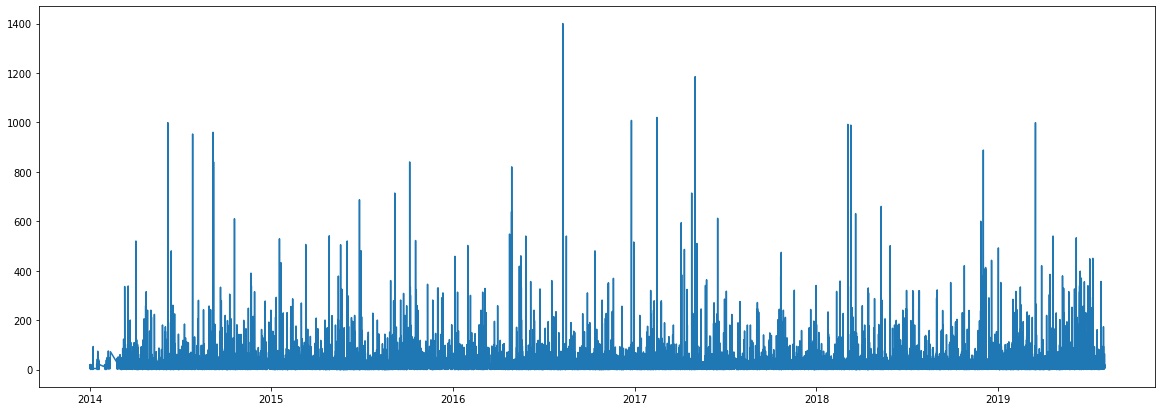

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(train_df['Date Time'], train_df["Min Delay"])

Since the data used for visualization is too long, it is really difficult to see patern directly.


Dividing the data into groups based on time of the day.

To check how the time of the day affects the delay

Different time of the day are categorized as:
1. Morning (5 AM to 12 PM)
2. Afternoon (12 PM to 5 PM)
3. Evening (5 PM to 9 PM)
4. Night (9 PM to 5 AM)



In [ ]:
def day_divider(hour):
  if hour > 5 and hour < 12:
    return "morning"
  elif hour >= 12 and hour < 17: 
    return "afternoon"
  elif hour >= 17 and hour < 21:
    return "evening"
  else:
    return "night"

        
train_df["Part of Day"] = train_df.apply(lambda x: day_divider(x["Date Time"].hour),axis=1)

In [ ]:
train_df.head()

,Route,Day,Direction,Min Delay,Min Gap,Date Time,Part of Day
0,505,Thursday,E/B,4.0,8.0,2014-01-02 06:31:00+00:00,morning
1,504,Thursday,E/B,20.0,22.0,2014-01-02 12:43:00+00:00,afternoon
2,501,Thursday,W/B,13.0,19.0,2014-01-02 14:01:00+00:00,afternoon
3,504,Thursday,W/B,7.0,11.0,2014-01-02 14:22:00+00:00,afternoon
4,504,Thursday,E/B,3.0,6.0,2014-01-02 16:42:00+00:00,afternoon


In [ ]:
train_df["Part of Day"].isnull().value_counts()

False    71967
Name: Part of Day, dtype: int64

<BarContainer object of 4 artists>

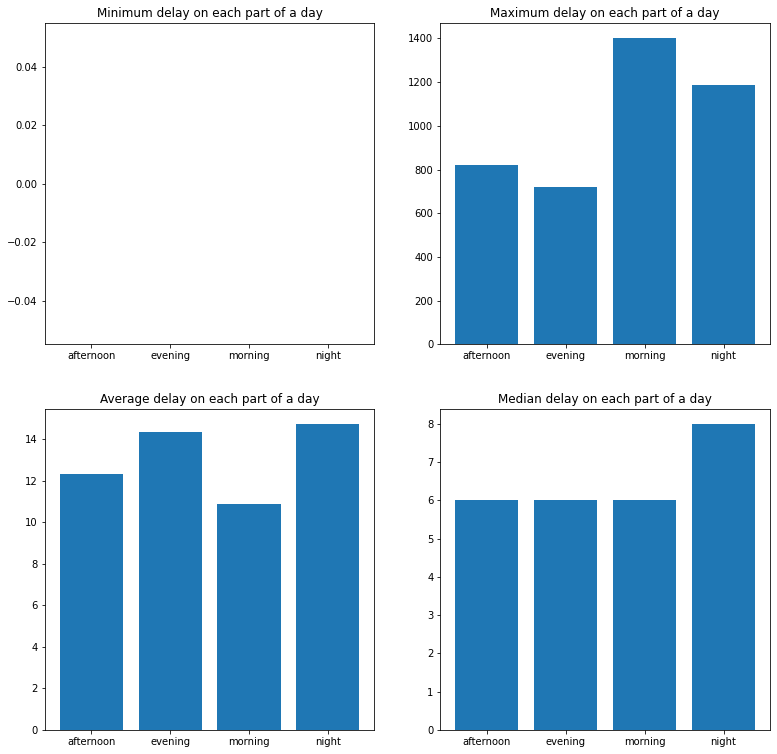

In [ ]:
# Let's plot some bar graph showing how much delay are occuring in each part of the day
plt.figure(figsize=(13, 13))
plt.subplot(2,2,1)
plt.title("Minimum delay on each part of a day")
plt.bar(train_df.groupby(["Part of Day"])["Min Delay"].min().reset_index()['Part of Day'], train_df.groupby(["Part of Day"])["Min Delay"].min())
plt.subplot(2,2,2)
plt.title("Maximum delay on each part of a day")
plt.bar(train_df.groupby(["Part of Day"])["Min Delay"].max().reset_index()['Part of Day'], train_df.groupby(["Part of Day"])["Min Delay"].max())
plt.subplot(2,2,3)
plt.title("Average delay on each part of a day")
plt.bar(train_df.groupby(["Part of Day"])["Min Delay"].mean().reset_index()['Part of Day'], train_df.groupby(["Part of Day"])["Min Delay"].mean())
plt.subplot(2,2,4)
plt.title("Median delay on each part of a day")
plt.bar(train_df.groupby(["Part of Day"])["Min Delay"].median().reset_index()['Part of Day'], train_df.groupby(["Part of Day"])["Min Delay"].median())

### From here it is very clear that the most of the delay occurs in night and least delays occurs during morning.

### So part of the day is also a good feature to include for predicting the delay

_______

## Analysis done on :

*   [x] Route
*   [x] Location
*   [x] Day  
*   [x] Time
*   [ ] Min Gap
*   [ ] Direction

_______

### Analysis on Min Gap between the current street car and already en route street car

In [ ]:
train_df["Min Gap"].describe()

count    71869.000000
mean        18.119982
std         33.659001
min          0.000000
25%          9.000000
50%         12.000000
75%         20.000000
max       4216.000000
Name: Min Gap, dtype: float64

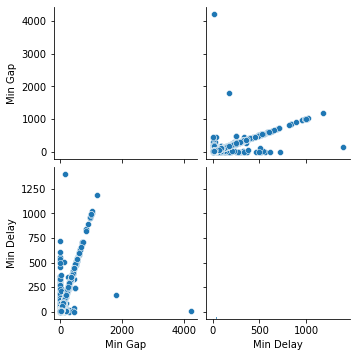

In [ ]:
sns.pairplot(train_df[["Min Gap", "Min Delay"]])

From the pairplot it is very much understandable that there is some linear kind of relationship between Min Delay and Min Gap. So, we will use this feature as well for predicting the delay.

Preprocessing the NaN Values in the Min Gap feature

I will not drop the samples, where there are no any Min Gap values, however they will be replaced by the Average Min Gap value

In [ ]:
train_df["Min Gap"].isnull().value_counts()

False    71869
True        98
Name: Min Gap, dtype: int64

In [ ]:
def clean_gap(df):
  # This function will help to clean the Min Gap column feature with training data Min Gap mean value
  df["Min Gap"] = df["Min Gap"].fillna(train_df['Min Gap'].mean())
  return df

In [ ]:
train_df = clean_gap(train_df)

In [ ]:
train_df["Min Gap"].isnull().value_counts()

False    71967
Name: Min Gap, dtype: int64

______
## Analysis done on :

*   [x] Route
*   [x] Location
*   [x] Day  
*   [x] Time
*   [x] Min Gap
*   [ ] Direction

### Now doing analysis on direction feature, which I believe is the key for avoiding delays of the route

In [ ]:
train_df["Direction"].describe()

count     71686
unique       98
top         W/B
freq      28257
Name: Direction, dtype: object

In [ ]:
train_df["Direction"].unique()

array(['E/B', 'W/B', 'S/B', 'N/B', 'EB', 'WB', 'B/W', 'BW', 'bw', 's',
       'NB', 'wb', 'eb', 'w/b', 'ew', 'b/w', 'eastbound', 'w', 'sb',
       'southbound', 'northbound', 'Service adjusted.', 'westbound', 'nb',
       nan, 'b#', 'SB', 'we', 'EW', 'E', 'Service adjusted', 'W', '14',
       's/b', '5', 'Bw', '0', 'sw', '2', '506', '54495', '4075', '12',
       'bs', 'wruiter adv', '(Ref', 'e', '9', 'gap', '1114', 'run', 'ss',
       '19', '5                       W/B', '68029', 'eb``', '6', '512',
       'W`', 'n/b', '\\5', '10', '4', '7', '13', '-BD#', '`', '510', '\\',
       '26', 'W\\B', 'N', '20', '8', 'e/b', 'ee', '.', 'See also', 'w/B',
       'E5', 'Relief Operator. Ga', '18', '15', 'E/B W/B', '33', 'E/W',
       'EB/WB', 'e/B', 'N/S', 'e/w', '30', 'S-E', 's/n', '1573', '-',
       '31087', 'NBN', 'Eb', 'WN'], dtype=object)

In [ ]:
train_df["Direction"].value_counts()

W/B      28257
E/B      27839
N/B       5163
S/B       4944
B/W       4743
         ...  
1573         1
e/B          1
S-E          1
31087        1
s/n          1
Name: Direction, Length: 98, dtype: int64

# This direction column is very noisy. 

Need to filter this column such that we only have 5 directions
1. __eb__ for eastbound
2. __wb__ for westbound
3. __nb__ for northbound
4. __sb__ for southbound
5. __bw__ for bothways

In [ ]:
valid_directions = ['eb','wb','nb','sb','bw']
def check_direction (x):
    if x in valid_directions:
        return(x)
    else:
        return("bad direction")

In [ ]:
df = train_df.copy(deep=True)

In [ ]:
def direction_cleanup(df):
    print("Direction count pre cleanup",df['Direction'].nunique())
    df['Direction'] = df['Direction'].str.lower()
    df['Direction'] = df['Direction'].str.replace('/','')
    df['Direction'] = df['Direction'].replace({'eastbound':'eb','westbound':'wb','southbound':'sb','northbound':'nb'})
    df['Direction'] = df['Direction'].apply(lambda x:check_direction(x))
    print("Direction count post cleanup",df['Direction'].nunique())
    return(df)

In [ ]:
train_df = direction_cleanup(train_df)

Direction count pre cleanup 98
Direction count post cleanup 6


In [ ]:
train_df['Direction'].unique()

array(['eb', 'wb', 'sb', 'nb', 'bw', 'bad direction'], dtype=object)

In [ ]:
train_df["Direction"].value_counts()

wb               28475
eb               28157
nb                5197
sb                4977
bw                4766
bad direction      395
Name: Direction, dtype: int64

In [ ]:
# Removing the bad directions examples
# Because we cannot directly relate any other way to put the correct directions in them

train_df = train_df[train_df["Direction"]!= "bad direction"]

In [ ]:
train_df.sample(10)

,Route,Day,Direction,Min Delay,Min Gap,Date Time,Part of Day
10956,504,Monday,wb,3.0,6.0,2014-12-29 06:46:00+00:00,morning
25033,504,Tuesday,eb,4.0,8.0,2016-02-16 05:45:00+00:00,night
39437,501,Tuesday,eb,10.0,15.0,2017-02-21 08:25:00+00:00,morning
27000,504,Tuesday,bw,4.0,8.0,2016-04-05 14:05:00+00:00,afternoon
20381,506,Friday,wb,25.0,30.0,2015-09-18 16:20:00+00:00,afternoon
18246,512,Saturday,eb,5.0,10.0,2015-07-18 13:57:00+00:00,afternoon
36106,501,Friday,eb,18.0,24.0,2016-12-09 21:32:00+00:00,night
11305,506,Wednesday,wb,8.0,13.0,2015-01-07 17:47:00+00:00,evening
40833,510,Sunday,eb,7.0,12.0,2017-04-02 17:54:00+00:00,evening
48770,501,Saturday,eb,6.0,12.0,2017-11-18 07:59:00+00:00,morning


In [ ]:
print(train_df["Direction"].value_counts())

wb    28475
eb    28157
nb     5197
sb     4977
bw     4766
Name: Direction, dtype: int64


<BarContainer object of 5 artists>

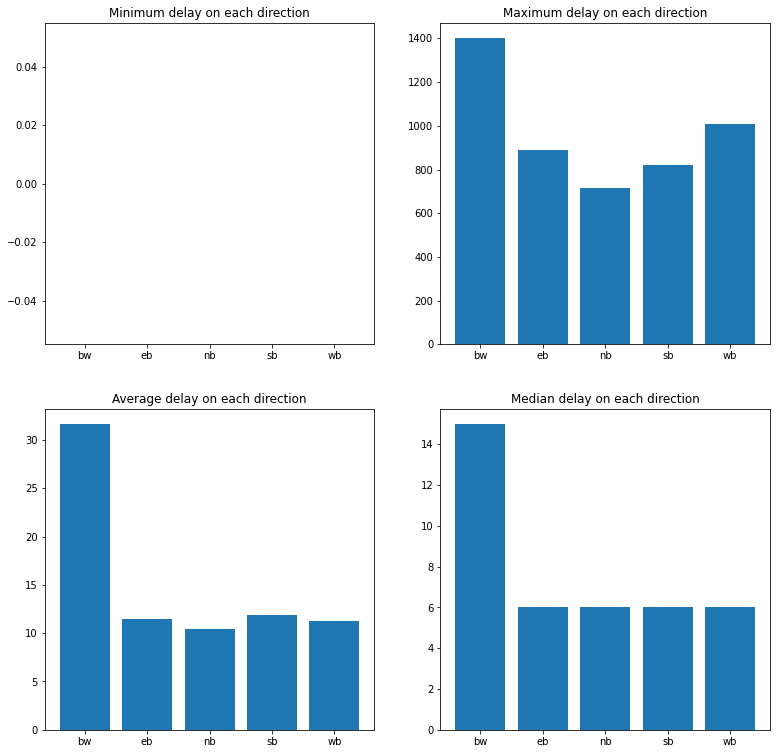

In [ ]:
# Bad directions has been filtered
# Working on visualizing the plots of different directions and its impact on delay
# Let's plot some bar graph showing how much delay are occuring in each part of the day
plt.figure(figsize=(13, 13))
plt.subplot(2,2,1)
plt.title("Minimum delay on each direction")
plt.bar(train_df.groupby(["Direction"])["Min Delay"].min().reset_index()['Direction'], train_df.groupby(["Direction"])["Min Delay"].min())
plt.subplot(2,2,2)
plt.title("Maximum delay on each direction")
plt.bar(train_df.groupby(["Direction"])["Min Delay"].max().reset_index()['Direction'], train_df.groupby(["Direction"])["Min Delay"].max())
plt.subplot(2,2,3)
plt.title("Average delay on each direction")
plt.bar(train_df.groupby(["Direction"])["Min Delay"].mean().reset_index()['Direction'], train_df.groupby(["Direction"])["Min Delay"].mean())
plt.subplot(2,2,4)
plt.title("Median delay on each direction")
plt.bar(train_df.groupby(["Direction"])["Min Delay"].median().reset_index()['Direction'], train_df.groupby(["Direction"])["Min Delay"].median())

### It can be clearly seen from the analysis, that the direction has impact on the delay.

### If the route is bothways direction, then the average delay is very high however the direction specific routes has comparatively less delay.

### This feature can be a good source for prediction by the model

________

______
## Analysis done on :

*   [x] Route
*   [x] Location
*   [x] Day  
*   [x] Time
*   [x] Min Gap
*   [x] Direction

## Data analysis complete, and the required function has been created in the notebook, which can be directly used for further model development and testing.
